# TERM PROJECT
>**<p style="font-size:20px">INDEX</p><br>**
    >   1. Dataset<br>
    >   2. Object & Purpose<br>
    >   3. Schedule<br>
    >   4. Description<br>

***
***

## 1. DataSet
**[E-commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics)**

>*This is the data of Product Shipment Tracking
>*The data set has 12 atrributes and 10999 data 
    
**Dataset Attributes**

1. **ID**: ID Number of Customers.
2. **Warehouse block**: The Company have big Warehouse which is divided in to block such as A, B, C, D, F.
3. **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.
4. **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
5. **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. **Cost of the product**: Cost of the Product in US Dollars.
7. **Prior purchases**: The Number of Prior Purchase.
8. **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
9. **Gender**: Male and Female.
10. **Discount offered**: Discount offered on that specific product.
11. **Weight in gms**: It is the weight in grams.
12. **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
***

## 2. Object & Purpose

**Reached.on.Time_Y.N**
    
    The target is “Reached.on.Time_Y.N”. Reached.on.Time_Y.N represents 1 if the product was reached on time, and 0 if it was not reached on time. Other features allow us to predict whether a product will reach on time. If it is predicted that it cannot be reached on time, it can guide customers again, which will help the business.
***

## 3. Schedule
This project would get **every MONDAY 20:00**<br>
***

## 4. Description
1. import libraries and data-set
2. check missing value & describe data
3. change categorical value (LabelEncoder)
4. show statistical chart
5. scaling

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time
import copy
import mglearn

In [2]:
data = pd.read_csv("ecommerce_shipping.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
def Basic_Info(data):
    print('data information\n')
    print(data.info())
    
    print('\ndata.describe\n')
    print(data.describe())
    
    print('\nsearch null data')
    print(data.isna().sum())

In [4]:
Basic_Info(data)

data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None

data.describe

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.00

no need to treat null value(there isn't null value)

In [5]:
data = data.drop("ID", axis=1)

In [6]:
# Categorical type of columns
categorical_list = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
for column in categorical_list:
    print(data[column].value_counts().sort_index())
    print(data[column].value_counts().sum())

A    1833
B    1833
C    1833
D    1834
F    3666
Name: Warehouse_block, dtype: int64
10999
Flight    1777
Road      1760
Ship      7462
Name: Mode_of_Shipment, dtype: int64
10999
1    2235
2    2165
3    2239
4    2189
5    2171
Name: Customer_rating, dtype: int64
10999
high       948
low       5297
medium    4754
Name: Product_importance, dtype: int64
10999
F    5545
M    5454
Name: Gender, dtype: int64
10999
0    4436
1    6563
Name: Reached.on.Time_Y.N, dtype: int64
10999


### Target, NonTarget Define

In [7]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0, 1] # range of target
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

### Make histogram 

In [8]:
# def : make histogram number of feature value according to each categorical target feature
# input : target feature, features without target, target range, whole dataframe
def makehist_countft_bytg(tg_name,ft_name,tg_range,data):
    fig, axes = plt.subplots(1, len(tg_range),sharex = True, sharey = True, figsize=(22,5)) #make fig    
    fig.suptitle(ft_name)
    axes_cnt = 0
    for i in tg_range:
        data_per_target = data[data[tg_name] == i]
        data_per_target = data_per_target[ft_name] 
        axes[axes_cnt].hist(data_per_target, bins = 10)
        axes[axes_cnt].grid(True)
        axes[axes_cnt].set_title(tg_name +" = " + str(i))
        axes_cnt = axes_cnt + 1
    plt.show()

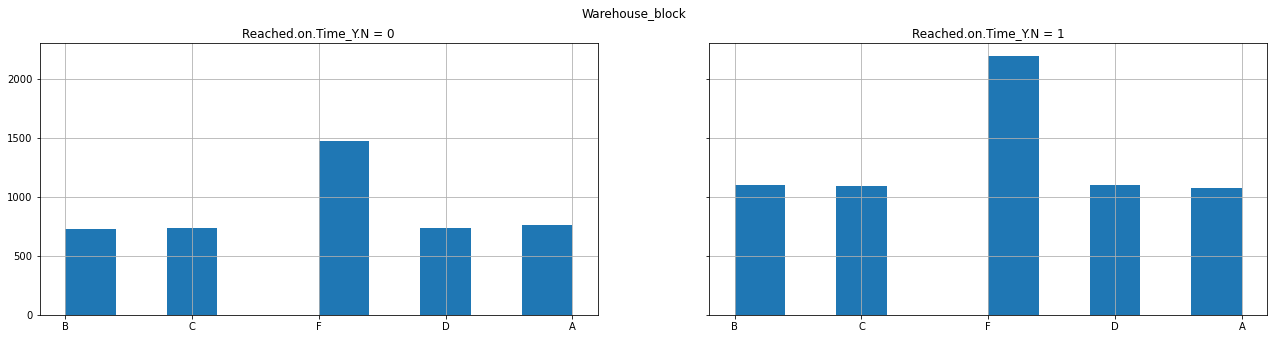

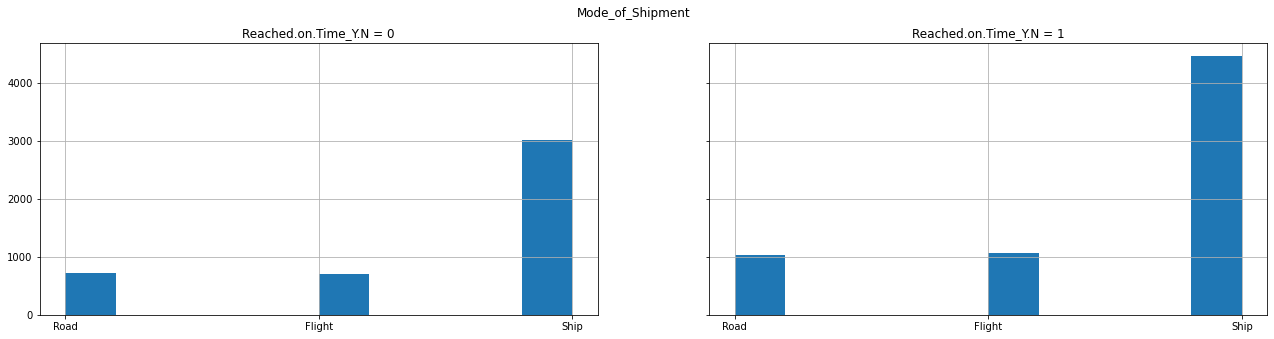

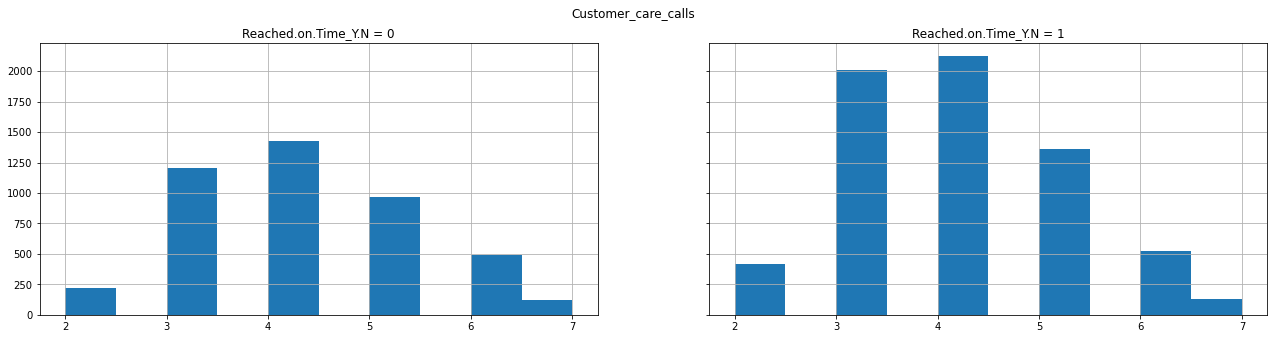

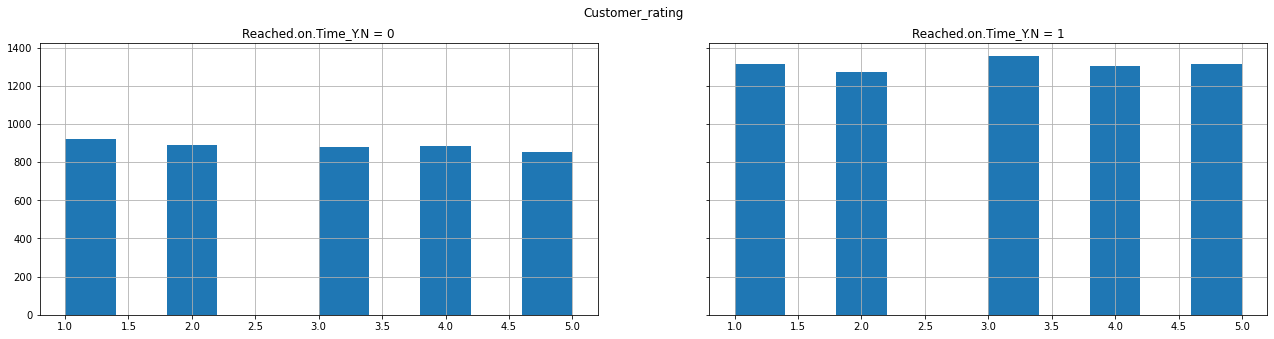

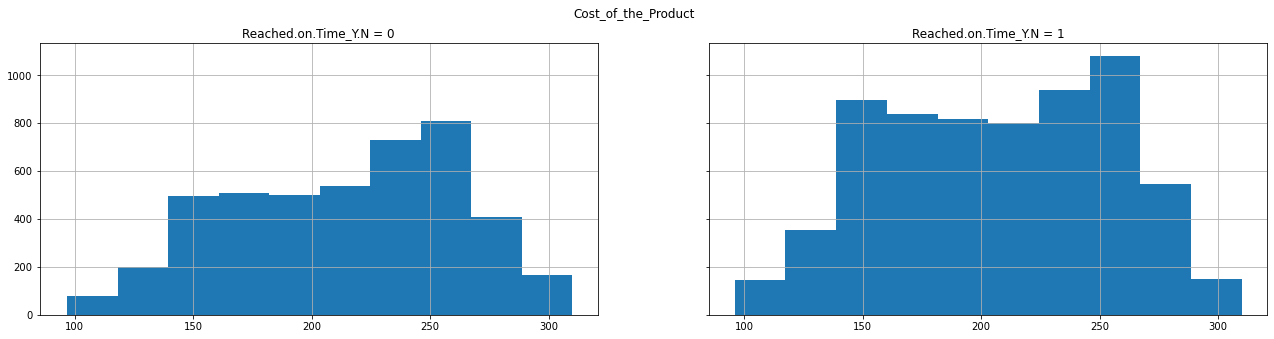

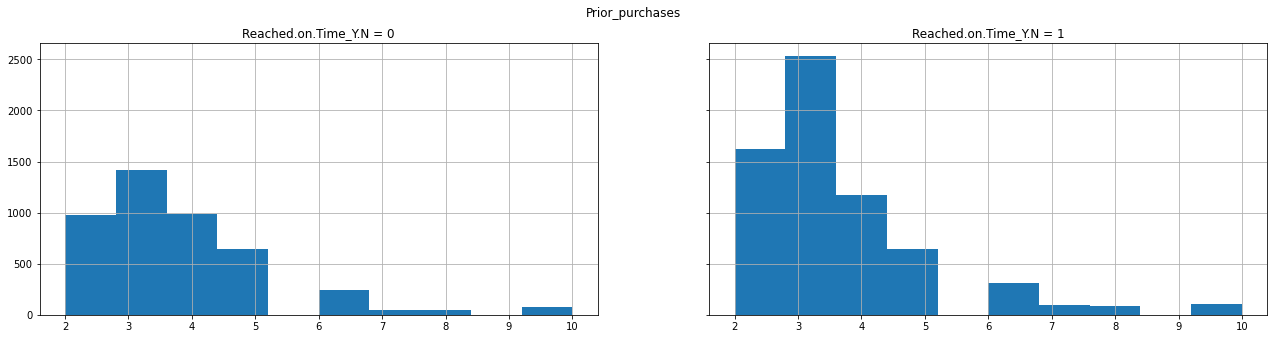

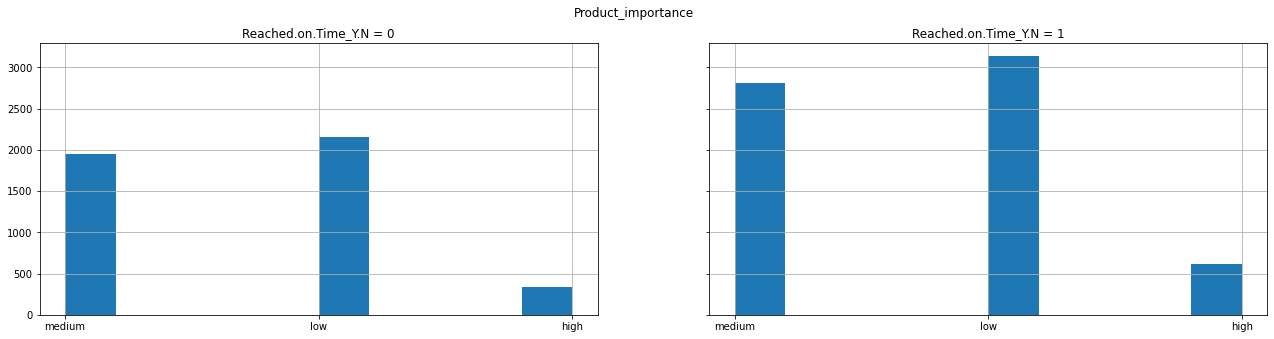

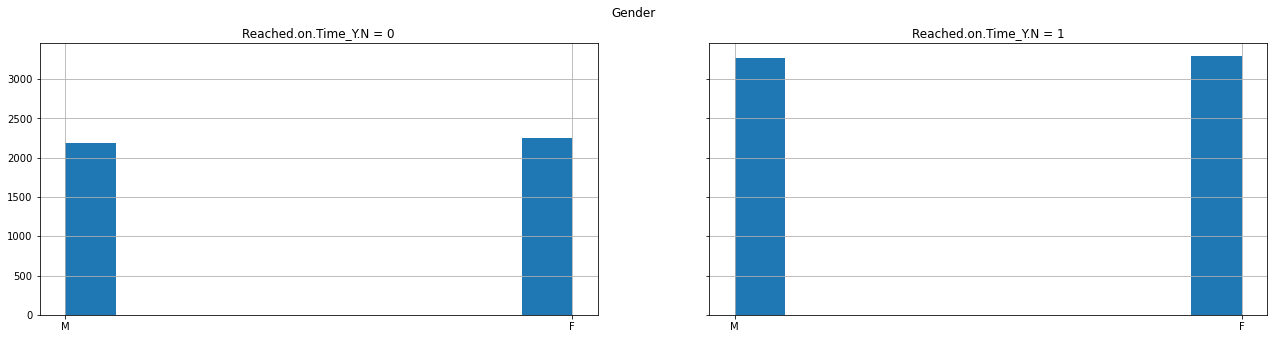

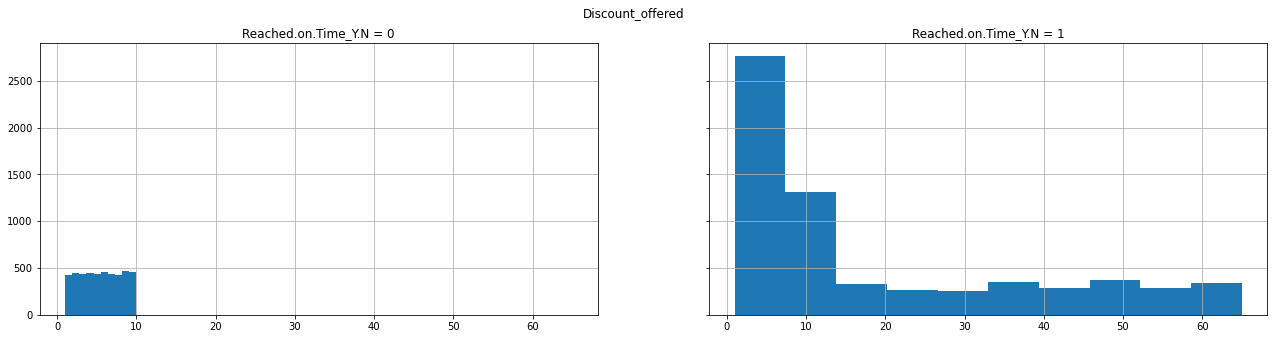

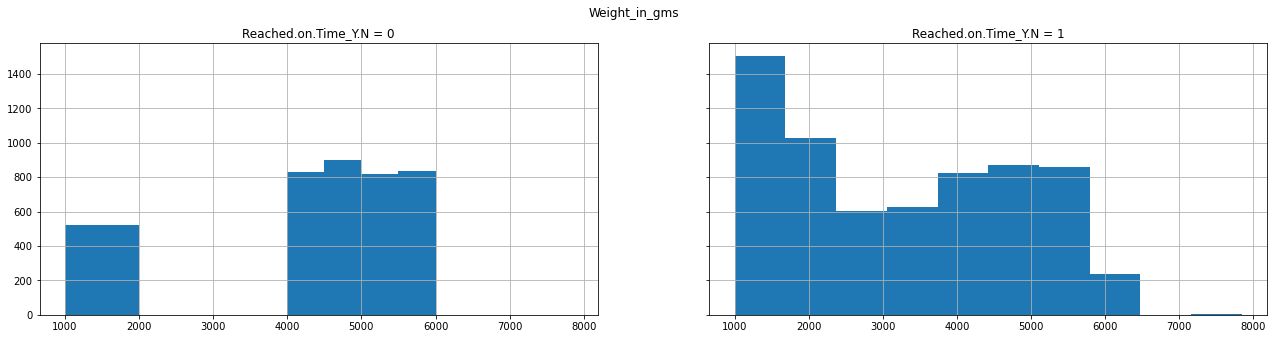

In [9]:
for i in other_feature:
    makehist_countft_bytg(target_feature,i,target_range,data)

### Correlation

<AxesSubplot:>

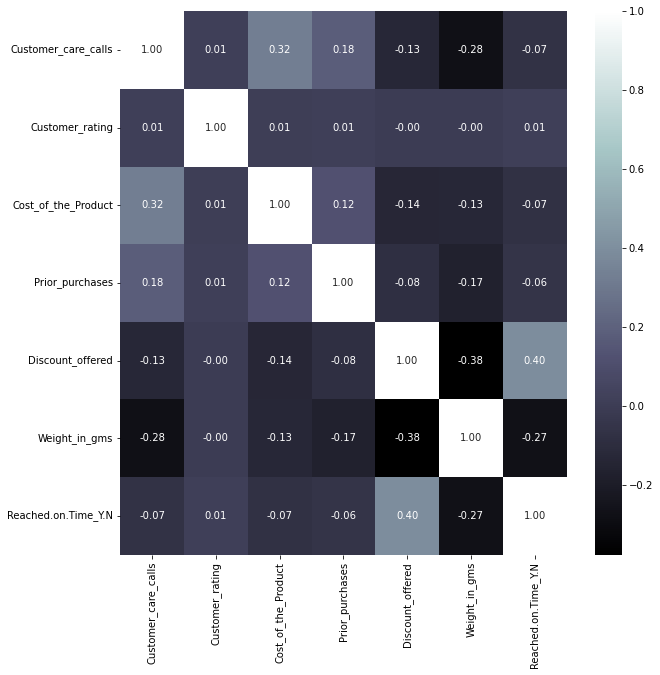

In [10]:
# heatmap corrleation
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'bone')

### Change Categorical data

In [11]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    data[feature_name] = label_encoder.fit_transform(data[feature_name])
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5,2,0,1,1538,1
10995,1,2,4,1,232,5,2,0,6,1247,0
10996,2,2,5,4,242,5,1,0,4,1155,0
10997,4,2,5,2,223,6,2,1,2,1210,0


### Scaling def

In [12]:
# drop target feature
y = data[target_feature]
X = data.drop(target_feature, axis=1)

In [13]:
def Scaling(X_train, X_test, scaler):
    scaled_train = pd.DataFrame(scaler.fit_transform(X_train))
    scaled_test = pd.DataFrame(scaler.fit_transform(X_test))
    return scaled_train, scaled_test

### Modeling

In [14]:
'''
def : Classification
input:
    X : Other features
    Y : target feature (Reached.on.Time_Y.N)
    model : classification model (decision tree, kneighbors, logistic)
return :
    cross val score
    auc score
    r2 score
'''
def Classifier(X, y, model, scalers):
    return_res=[] # return to result
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for i in scalers:
        X_train, X_test = Scaling(X_train, X_test, i) # scaling first, 

        param = range(2, 12)
        for p in param:
            result = [] # result of model
            t = time.time()
            result.append(model) # 1, append model, scaling
            result.append(i)
            
            if model.find("KNeighbor")!=-1 and p%2==1:
                m = KNeighborsClassifier(n_neighbors=p)
                result.append({'n_neighbors':p}) # 2, append paramter
                
            elif model.find("Tree")!=-1:
                if model.find("gini")!=-1:
                    # case of gini criterion
                    m = DecisionTreeClassifier(criterion = 'gini', max_depth = p)
                    result.append({'criterion':'gini', 'max_depth':p}) # 2, append parameter
                elif model.find("entropy")!=-1:
                    # case of entropy criterion
                    m = DecisionTreeClassifier(criterion = 'entropy', max_depth = p)
                    result.append({'criterion':'entropy', 'max_depth':p}) # 2, append parameter
            elif model.find("Logistic")!=-1 and p==2:
                m = LogisticRegression()
                result.append('') # 2, logistic regression doesn't has parameter
                
            else:
                continue


            m.fit(X_train, y_train)
            y_pred = m.predict(X_test)
            
            runtime = time.time() - t
            
            scores = cross_val_score(m, X, y, cv=5)
            score_cv = scores.mean()
            fper, tper, thresholds = roc_curve(y_test, y_pred)
            score_auc = auc(fper, tper)
            score_ac = accuracy_score(y_test, y_pred)
            score_r2 = '' # this is scoring in regression
            
            # 3, append score in order to cv, auc, ac, r2 ,runtime , algorithm model
            result.extend([score_cv, score_auc, score_ac, score_r2, runtime, m])
            return_res.append(result)
            
    return return_res

In [15]:
'''
def : Regression
input:
    X : Other features
    Y : target feature (Reached.on.Time_Y.N)
    model : classification model (polynomialRegression, multipleRegression)
return :
    cross val score
    auc score
    r2 score
'''
def Regression(X, y, model_name, scalers):
    return_res=[]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
    for i in scalers:
        result = []
        t = time.time()
        
        X_train, X_test = Scaling(X_train, X_test, i)

        if model_name == 'polynomialRegression':
            poly = PolynomialFeatures(degree = 2, include_bias = True)
            X_train_ = poly.fit_transform(X_train)
            X_test_ = poly.fit_transform(X_test)
        elif model_name == 'multipleRegression':
            X_train_ = X_train
            X_test_ = X_test
        else :
            continue
        
        result.extend([model_name, i, '']) # 1, append model , scaling , (regression doesn't have parameter)
        model = LinearRegression()
        
        model.fit(X_train_, y_train)
        y_pred = model.predict(X_test_)
        runtime = time.time() - t
        
        scores = cross_val_score(model, X_train_, y_train, cv=5)
        score_cv = scores.mean()
        fper, tper, thresholds = roc_curve(y_test, y_pred)
        score_auc = auc(fper, tper)
        score_ac = '' # this is scoring in Classification
        score_r2 = r2_score(y_test, y_pred)

        # 2, append scores in order to cv, auc, ac, r2, runtime , model       
        result.extend([score_cv, score_auc, score_ac, score_r2, runtime, model])
        return_res.append(result)
            
    return return_res

In [16]:
'''
def : Ensemble
input:
    X : Other features
    Y : target feature (Reached.on.Time_Y.N)
    model : ensemble model (RandomForest, GradientBoosting)
return :
    cross val score
    auc score
    r2 score
'''
def Ensemble(X, y, model, scalers):
    return_res=[]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for i in scalers:
        X_train, X_test = Scaling(X_train, X_test, i)

        n_estimator_range = range(2, 12) # to find result in estimator range 2 ~ 11 
        max_depth_range = range(3,7) # to find result in depth range 2 ~ 11 
        
        for n_estimator_param in n_estimator_range:
            for max_depth_param in max_depth_range:
                result = []
                
                param_dict = {}
                t = time.time()
                result.append(model) # 1, append model, scaling
                result.append(i)
                
                param_dict = {'n_estimators': n_estimator_param, 'max_depth': max_depth_param}

                if model == 'RandomForest':
                    m = RandomForestClassifier(n_estimators = n_estimator_param, max_depth = max_depth_param)
                elif model == 'GradientBoosting':
                    m = GradientBoostingClassifier(learning_rate = 1, n_estimators = n_estimator_param, max_depth = max_depth_param)
                else:
                    continue
                
                result.append(param_dict) # 2, append parameter

                m.fit(X_train, y_train)
                y_pred = m.predict(X_test) # check prediction by testing model to be used 'ensemble'
                runtime = time.time() - t
                
                scores = cross_val_score(m, X_train, y_train, cv=5)
                score_cv = scores.mean()
                fper, tper, thresholds = roc_curve(y_test, y_pred)
                score_auc = auc(fper, tper)
            
                score_ac = accuracy_score(y_test, y_pred)
                score_r2 = ''
            
                # 3, append scores in order to cv, auc, ac, r2, runtime , model   
                result.extend([score_cv, score_auc, score_ac, score_r2, runtime, m])
                return_res.append(result)
            
    return return_res

### Find best score

In [17]:
"""
def : find best scores
input :
    df : final result after all process
    ft_name : what kinds of scoring (cv, auc, ac, r2)
    n : the highest rank in order n (1 ~ n)
return : dataframe after descending sorting
"""
def best_n(df, ft_name, n):
    df.sort_values(by = ft_name, ascending = False, inplace = True)
    return df[:n]

## Main code
### Algorithm
    Regression : polynomialRegression, multipleRegression
    Classification : DecisionTree(Gini, Entropy), KNeighborsClassifier, LogisticRegression
    
    validation using Ensemble
    RandomForest, GradientBoosting

In [18]:
def Modeling(scalers, regression_name, classification_name, ensemble_name, target_feature):

    X = data.drop(target_feature, axis=1)
    y = data[target_feature]

    # temp repository of result
    result_regression = []
    result_classification = []
    result_ensemble = []
    result = []

    """
    find out using regression, classification, ensemble
    """
    for model in regression_name: # regression
        result_regression.append(Regression(X, y, model, scalers))
    result_regression = sum(result_regression, [])

    for model in classification_name: # Classification
        result_classification.append(Classifier(X, y, model, scalers))
    result_classification = sum(result_classification, [])

    for model in ensemble_name: # Ensemble for evaluation
        result_ensemble.append(Ensemble(X, y, model, scalers))
    result_ensemble = sum(result_ensemble, [])

    # final result sum regression, classification, ensemble
    final_list = result_regression+ result_classification + result_ensemble

    final_result = pd.DataFrame(final_list, columns=
                     ['Model', 'Scaler', 'Parameter_dict', 'score_cv', 'score_auc', 'score_ac', 'score_r2', 'runtime', 'model_'])
    return final_result

In [19]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
regression_name = ['polynomialRegression', 'multipleRegression']
classification_name = ['DecisionTree(gini)', 'DecisionTree(entropy)', 'KNeighborsClassifier', 'LogisticRegression']
ensemble_name = ['RandomForest','GradientBoosting']

final_result = Modeling(scalers, regression_name, classification_name, ensemble_name, target_feature)
final_result.head(10)

,Model,Scaler,Parameter_dict,score_cv,score_auc,score_ac,score_r2,runtime,model_
0,polynomialRegression,StandardScaler(),,0.203415,0.629373,,-43225906.103365,0.041559,LinearRegression()
1,polynomialRegression,MinMaxScaler(),,0.202729,0.723819,,0.187144,0.036685,LinearRegression()
2,polynomialRegression,RobustScaler(),,0.203415,0.731504,,0.197756,0.048854,LinearRegression()
3,multipleRegression,StandardScaler(),,0.180671,0.726464,,0.178181,0.018883,LinearRegression()
4,multipleRegression,MinMaxScaler(),,0.180671,0.727181,,0.178365,0.016979,LinearRegression()
5,multipleRegression,RobustScaler(),,0.180671,0.728661,,0.179547,0.021992,LinearRegression()
6,DecisionTree(gini),StandardScaler(),"{'criterion': 'gini', 'max_depth': 2}",0.616770,0.683082,0.675152,,0.010007,DecisionTreeClassifier(max_depth=2)
7,DecisionTree(gini),StandardScaler(),"{'criterion': 'gini', 'max_depth': 3}",0.564401,0.715503,0.669091,,0.012965,DecisionTreeClassifier(max_depth=3)
8,DecisionTree(gini),StandardScaler(),"{'criterion': 'gini', 'max_depth': 4}",0.563673,0.716562,0.673333,,0.016957,DecisionTreeClassifier(max_depth=4)
9,DecisionTree(gini),StandardScaler(),"{'criterion': 'gini', 'max_depth': 5}",0.599219,0.717065,0.679091,,0.016899,DecisionTreeClassifier(max_depth=5)


In [20]:
#best 5
best5_score_cv = best_n(final_result, 'score_cv', 5)
best5_score_cv

,Model,Scaler,Parameter_dict,score_cv,score_auc,score_ac,score_r2,runtime,model_
163,RandomForest,MinMaxScaler(),"{'n_estimators': 11, 'max_depth': 6}",0.684244,0.725472,0.684848,,0.076969,"(DecisionTreeClassifier(max_depth=6, max_featu..."
142,RandomForest,MinMaxScaler(),"{'n_estimators': 6, 'max_depth': 5}",0.683856,0.707490,0.678485,,0.037524,"(DecisionTreeClassifier(max_depth=5, max_featu..."
115,RandomForest,StandardScaler(),"{'n_estimators': 9, 'max_depth': 6}",0.683724,0.711226,0.674242,,0.067885,"(DecisionTreeClassifier(max_depth=6, max_featu..."
118,RandomForest,StandardScaler(),"{'n_estimators': 10, 'max_depth': 5}",0.683465,0.713108,0.681818,,0.063144,"(DecisionTreeClassifier(max_depth=5, max_featu..."
197,RandomForest,RobustScaler(),"{'n_estimators': 10, 'max_depth': 4}",0.682816,0.701369,0.679697,,0.056989,"(DecisionTreeClassifier(max_depth=4, max_featu..."


In [21]:
best5_score_auc = best_n(final_result, 'score_auc', 5)
best5_score_auc

,Model,Scaler,Parameter_dict,score_cv,score_auc,score_ac,score_r2,runtime,model_
248,GradientBoosting,MinMaxScaler(),"{'n_estimators': 3, 'max_depth': 3}",0.681778,0.733643,0.684545,,0.040934,([DecisionTreeRegressor(criterion='friedman_ms...
2,polynomialRegression,RobustScaler(),,0.203415,0.731504,,0.197756,0.048854,LinearRegression()
154,RandomForest,MinMaxScaler(),"{'n_estimators': 9, 'max_depth': 5}",0.680218,0.730762,0.685758,,0.054798,"(DecisionTreeClassifier(max_depth=5, max_featu..."
160,RandomForest,MinMaxScaler(),"{'n_estimators': 11, 'max_depth': 3}",0.671644,0.729634,0.684242,,0.052928,"(DecisionTreeClassifier(max_depth=3, max_featu..."
208,GradientBoosting,StandardScaler(),"{'n_estimators': 3, 'max_depth': 3}",0.681778,0.729520,0.683636,,0.039929,([DecisionTreeRegressor(criterion='friedman_ms...


### Visualization

In [22]:
"""
def : make pie chart to display to count easily
input :
    data : best 5 score in cv, auc,,,
    ft_name : data's feature name(Scaler)
    ft_list : every kinds of scaling(StandardScaler, RobustSclaer, MinmaxScaler)
"""
def pie_chart(data, ft_name, ft_list):
    num_list = [] # counts list
    ft_li_ = []
    
    for i in range(0,len(ft_list)):
        temp_data = 0
        temp_data = data[ft_name] == ft_list[i] # ture, false if data[Scaler] is same ft_list[i](StandardScaler) it is true
        temp_len = len(temp_data[temp_data == True]) # count 'true'
        if (temp_len!=0):
            num_list.append(temp_len)
            ft_li_.append(ft_list[i])
    
    
    plt.pie(num_list, labels=ft_li_, autopct='%.1f%%')
    plt.show()

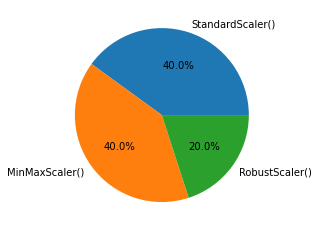

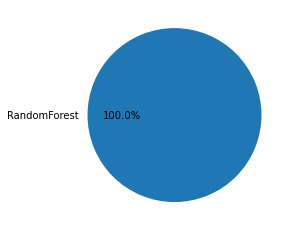

In [23]:
#what scaler is most?
pie_chart(best5_score_cv, 'Scaler', scalers)

#what model is most?
all_model_list = regression_name + classification_name + ensemble_name
pie_chart(best5_score_cv, 'Model', all_model_list)

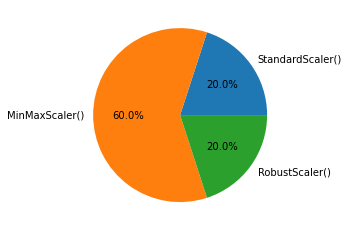

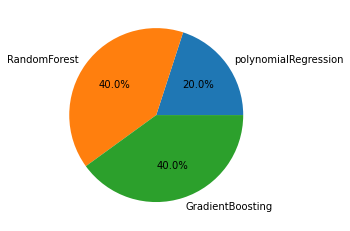

In [24]:
#what scaler is most?
pie_chart(best5_score_auc, 'Scaler', scalers)
#what model is most?
all_model_list = regression_name + classification_name +ensemble_name
pie_chart(best5_score_auc, 'Model', all_model_list)

In [25]:
def show_regression(name, y_predict, y_test, score, scaler, model):
    title = name + ' graph\n' + 'score : ' + str(round(score,5)) + ' scaler : ' + str(scaler)#반올림 있음
    plt.title(title)
    plt.scatter(y_predict,y_test)
    plt.xlabel('predict')
    plt.ylabel('real value')
    plt.show()
    
    temp = pd.DataFrame()
    temp['y_predict'] = y_predict
    list_temp = list(y_test)
    temp['y_test'] = list_temp
    index = [i for i in range(0, len(temp))]
    temp['index'] = index
    plt.figure(figsize=(20, 5))
    plt.title(name + ' graph2')
    plt.scatter(temp['index'],temp['y_predict'], color = 'red', alpha = 0.3, label = 'predict')
    plt.scatter(temp['index'],temp['y_test'], color = 'blue', alpha = 0.3, label = 'real value')
    plt.legend()
    plt.show()
    
    print(model.coef_)
    if name != 'polynomialRegression':
        print('Weight of features in regression')
        print(model.coef_)

In [26]:
def plot_roc_curve(y_Actual, y_Predicted):
    fper, tper, thresholds = roc_curve(y_Actual, y_Predicted)
    
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [27]:
def confusion_matrix(y_Actual, y_Predicted):
    confusion_matrix = pd.crosstab(y_Actual,  y_Predicted, rownames=['Actual'],  colnames=['Predicted'], margins=True)
    sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [28]:
def plot_decisionTree(model):
    fig = plt.figure(figsize=(25,20))
    plot_tree(model, 
          feature_names = target_feature, 
          class_names = other_feature, 
          filled = True, 
          rounded = True)

In [29]:
def re_best(df, all_model_list):

    for i in range(len(all_model_list)):
        if df['Model']==all_model_list[i]:
            model = all_model[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train, X_test = Scaling(X_train, X_test, df['Scaler'])
    m = df['model_']
    
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    plot_roc_curve(y_test, y_pred)
    confusion_matrix(y_test, y_pred)

    if df['Model'].find('Tree')!=-1 or df['Model'].find('Random')!=-1:
        if 'Random' in df['Model']:
            estimator = m.estimators_
            m = estimator[0]
    
        fig = plt.figure(figsize=(60,20))
        _ = plot_tree(m, 
                           feature_names=other_feature,  
                           class_names=target_feature,
                           filled=True, fontsize = 20)
        plt.show()
    
    elif 'Regression' in df['Model']:
        show_regression(df['Model'], y_pred, y_test, df['score_auc'], df['Scaler'], df['model_'])


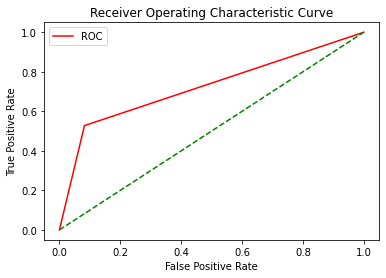

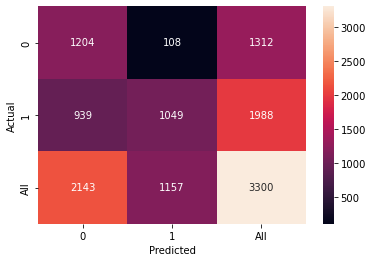

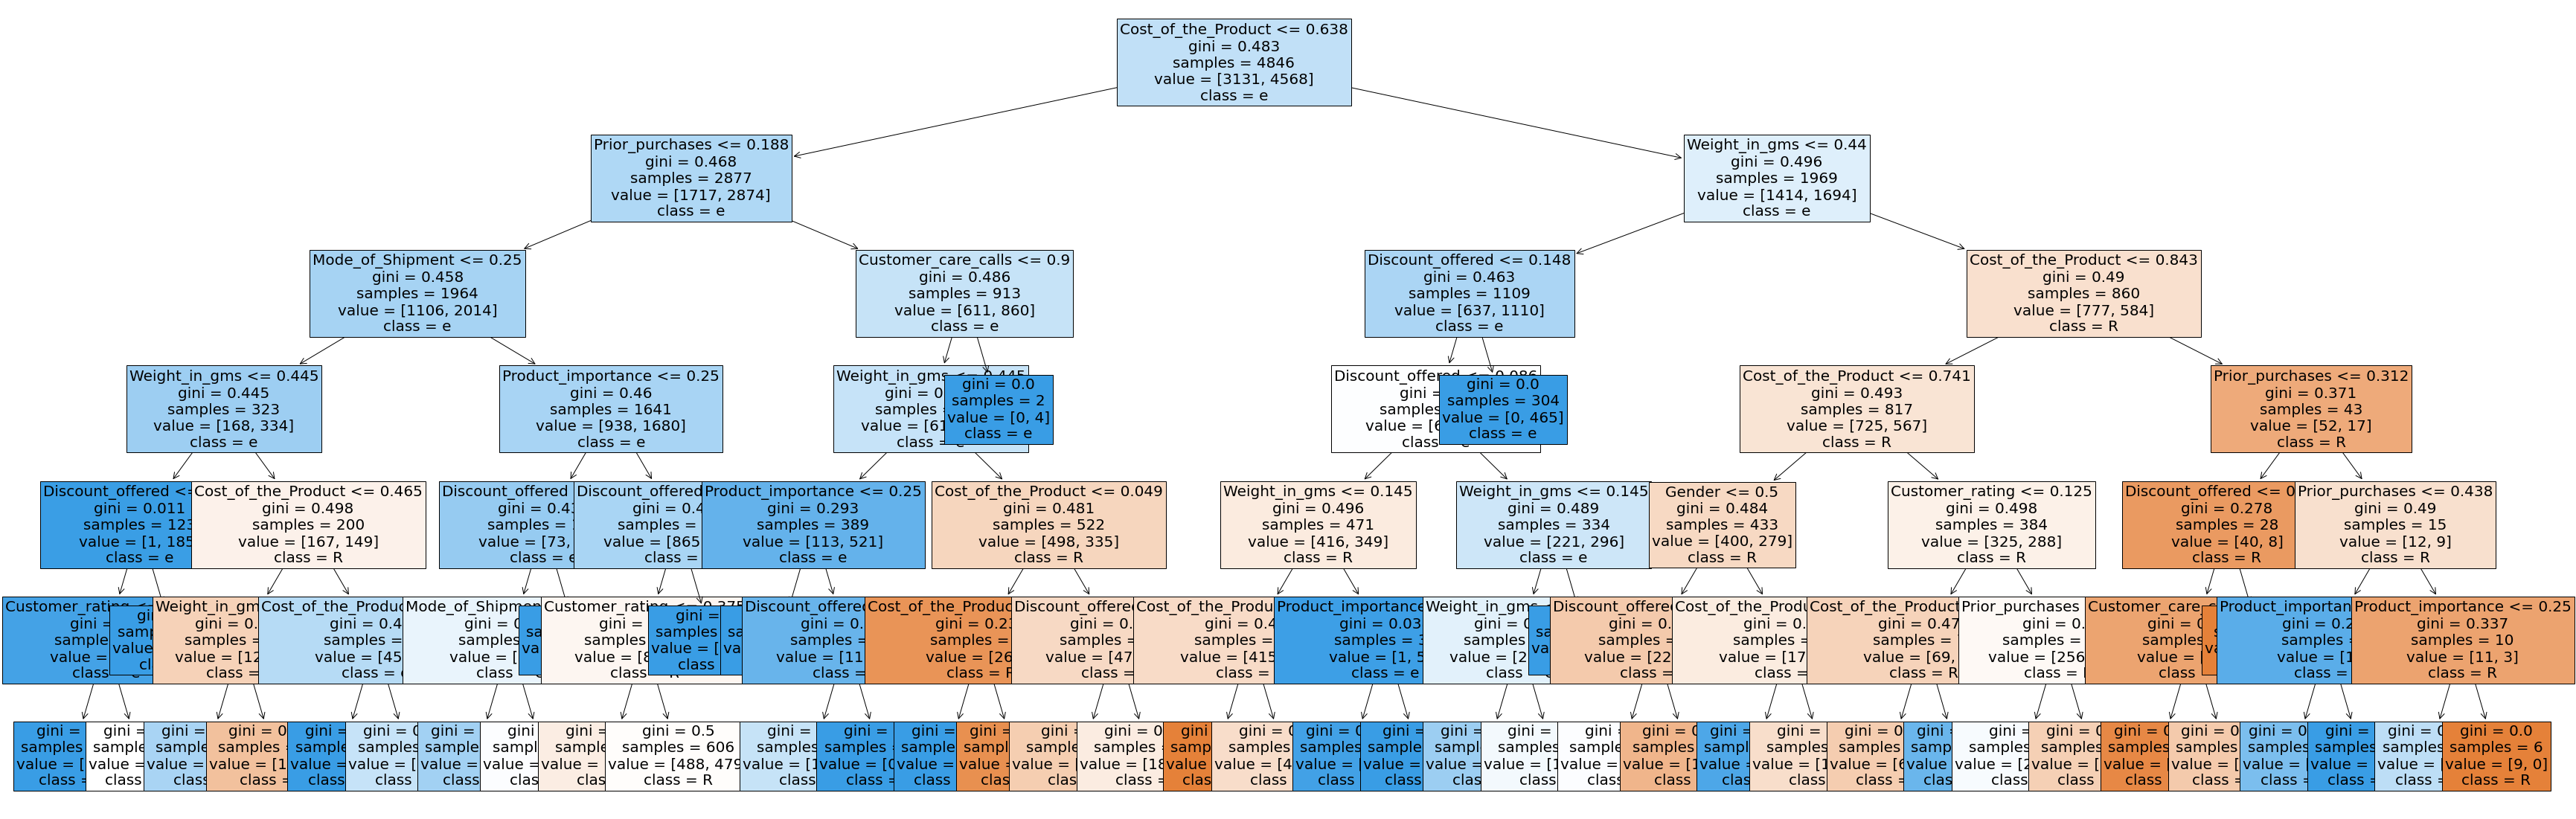

In [30]:
all_model = [LinearRegression, LinearRegression, DecisionTreeClassifier, DecisionTreeClassifier,
             KNeighborsClassifier, LogisticRegression, RandomForestClassifier, GradientBoostingClassifier]
re_best(best5_score_cv.iloc[0], all_model)

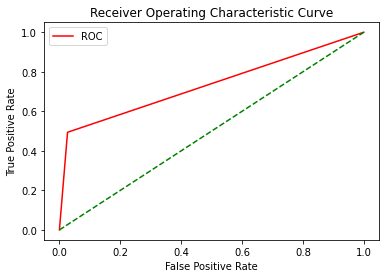

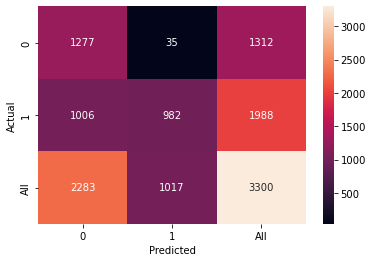

In [31]:
re_best(best5_score_auc.iloc[0], all_model)

In [32]:
def train_find_importance(best_5_score, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = best_5_score.iloc[0]['model_']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    answer = pd.DataFrame(y_test[:30].reset_index())
    del answer["index"]

    plt.plot(answer, label="answer")
    plt.plot(y_pred[:30], label="predict")
    plt.legend()

    # feature importance 추가하기
    ft_importance_values = model.feature_importances_


    ft_series = pd.Series(ft_importance_values, index = X_train.columns)
    ft_top = ft_series.sort_values(ascending=False)

    plt.figure(figsize=(12,6))
    plt.title('Feature Importance Top')
    sns.barplot(x=ft_top, y=ft_top.index)
    plt.show()
    
    print('score of each feature')
    print(ft_top)
    return ft_top

In [38]:
def visaulize_high_scored_feature(fttop):
    df_ = pd.concat([data[fttop.index[0]], data[fttop.index[1]], data['Reached.on.Time_Y.N']], axis=1)
    print(df_)
    
    sns.set_style("whitegrid")
    sns.pairplot(df_, hue="Reached.on.Time_Y.N")
    plt.show()

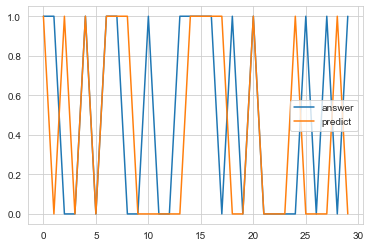

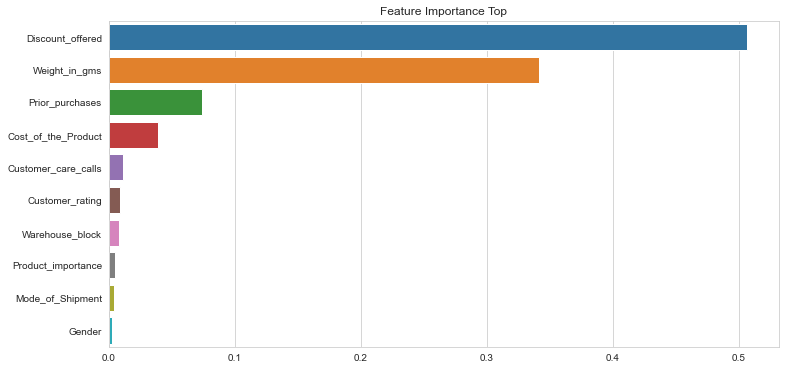

score of each feature
Discount_offered       0.506287
Weight_in_gms          0.341449
Prior_purchases        0.073837
Cost_of_the_Product    0.039123
Customer_care_calls    0.011175
Customer_rating        0.008563
Warehouse_block        0.007981
Product_importance     0.004914
Mode_of_Shipment       0.004275
Gender                 0.002396
dtype: float64


In [39]:
fttop = train_find_importance(best5_score_cv, X, y)

       Discount_offered  Weight_in_gms  Reached.on.Time_Y.N
0                    44           1233                    1
1                    59           3088                    1
2                    48           3374                    1
3                    10           1177                    1
4                    46           2484                    1
...                 ...            ...                  ...
10994                 1           1538                    1
10995                 6           1247                    0
10996                 4           1155                    0
10997                 2           1210                    0
10998                 6           1639                    0

[10999 rows x 3 columns]


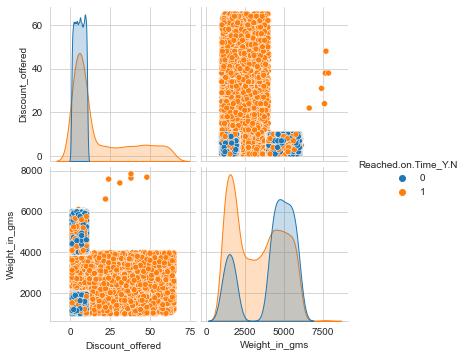

In [40]:
visaulize_high_scored_feature(fttop)